In [12]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import random
import json

def pca_plot(data, fpath, comparing):
    points = []
    for word in comparing:
        points.extend([word, np.array(row)] for row in data[word])
    random.shuffle(points)
    labels = np.array([point[0] for point in points])
    lookup, clabels = np.unique(labels, return_inverse=True)
    vectors = np.array([point[1] for point in points])

    pca = PCA(n_components=2)
    features_pca = pca.fit_transform(vectors)

    cmap = plt.cm.get_cmap('tab10', len(comparing))

    plt.figure(figsize=(5,5))
    plt.scatter(features_pca[:,0], features_pca[:,1], c=clabels, cmap='tab10', s=5, marker='.')

    # Add the axis labels
    plt.xlabel('PC 1 (%.2f%%)' % (pca.explained_variance_ratio_[0]*100))
    plt.ylabel('PC 2 (%.2f%%)' % (pca.explained_variance_ratio_[1]*100)) 
    plt.legend([mpatches.Patch(color=cmap(b)) for b in range(len(comparing))], lookup)
    plt.title(fpath.split('/')[-1].split('.')[0])

    plt.savefig(fpath, dpi=300)
    plt.show()

In [2]:
# load data generated form indiv_word_representations.ipynb
with open('data/indiv_word_representations/generate_vector_from_bloom.json', 'r') as f:
    vectors_from_bloom = json.load(f)
with open('data/indiv_word_representations/generate_vector_from_iterative_vectors.json', 'r') as f:
    vectors_from_iterative_vectors = json.load(f)

/var/folders/h1/88vswkjs65x3v7m1ytlwgpy40000gp/T/ipykernel_74190/620533951.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab10', len(comparing))


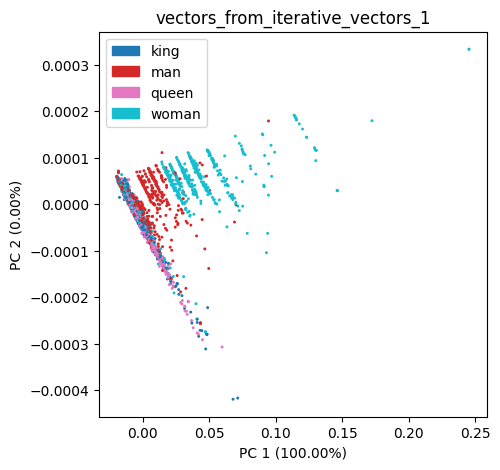

/var/folders/h1/88vswkjs65x3v7m1ytlwgpy40000gp/T/ipykernel_74190/620533951.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab10', len(comparing))


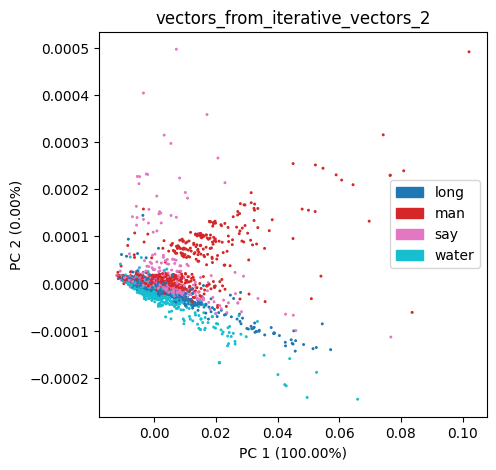

In [3]:
set1 = ["king", "queen", "man", "woman"]
set2 = ["long", "man", "say", "water"]
pca_plot(vectors_from_iterative_vectors, 'pca/vectors_from_iterative_vectors_1.png', set1)
pca_plot(vectors_from_iterative_vectors, 'pca/vectors_from_iterative_vectors_2.png', set2)

/var/folders/h1/88vswkjs65x3v7m1ytlwgpy40000gp/T/ipykernel_34335/2091414537.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab10', len(comparing))


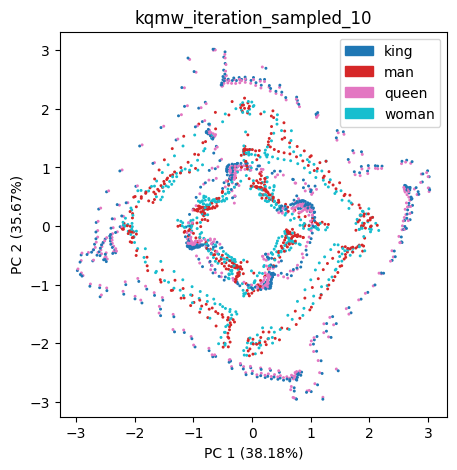

In [13]:
with open('data/kqmw_iteration.json', 'r') as f:
    kqmw_iteration = json.load(f)
sampled_10 = {word:[kqmw_iteration[word][i] for i in range(0,len(kqmw_iteration[word]),10)] for word in kqmw_iteration}
pca_plot(kqmw_iteration, 'pca/kqmw_iteration_sampled_10.png', ["king", "queen", "man", "woman"])